## Unsupervised learning subsumes all kinds of machine learning where there is no known output, no teacher to instruct the learning algorithm.

### In unsupervised learning, the learning algorithm is just shown the input data, and asked to extract knowledge from this data.

# Types of unsupervised learning

 ### In this chapter: transformations of the dataset, and clustering.
 
 
  - Unsupervised transformations of a dataset are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand.
  
  
  - A common application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finding a new way to represent this data that summarizes the essential characteristics about the data with fewer features.
  
  
   - Another application for unsupervised transformations is finding the parts or components that “make up” the data. An example of this is topic extraction on collections of text documents.

 - Clustering algorithms on the other hand partition data into distinct groups of similar items.
 
 # Challenges in unsupervised learning
 
 - A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful.
 
 
 - Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we don’t know what the right output should be.
 
 - Therefore it is very hard to say whether a model “did well”.
 
 - Often the only way to evaluate the result of an unsupervised algorithm is to inspect it manually.
 
  - As a consequence, unsupervised algorithms are used often in an exploratory setting, when a data scientist wants to understand the data better, rather than as part of a larger automatic system
  
  - Before we start with “real” unsupervised algorithms, we will briefly discuss some simple preprocessing methods that often come in handy.

# Preprocessing and Scaling

 - In the last chapter we saw that some algorithms, like neural networks and SVMs, are very sensitive to the scaling of the data.

In [1]:
import mglearn
mglearn.plots.plot_scaling()

# Different kinds of preprocessing

 - The first plot shows a synthetic two-class classification dataset with two features 
 
 - The StandardScaler in scikit-learn ensures that for each feature, the mean is zero, and the variance is one, bringing all features to the same magnitude. 
 
 - However, this scaling does not ensure any particular minimum and maximum values for the features

 - The RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale.
 
 - However, the RobustScaler uses the median and quartiles
 
 ### http://blog.naver.com/PostView.nhn?blogId=istech7&logNo=50152009300
 
 
 - This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). These odd data points are also called outliers, and might often lead to trouble for other scaling techniques.
  
  
 - The MinMaxScaler on the other hand shifts the data such that all features are exactly between 0 and 1.
  
 - Finally, the Normalizer does a very different kind of rescaling.
 
 - It scales each data point such that the feature vector has a euclidean length of one.
 
 - This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

# Applying data transformations

 - As an example, say we want to apply the kernel SVM (SVC) to the cancer dataset, and use MinMaxScaler for preprocessing the data

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [4]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not zero and one. Some of the features are even outside the 0-1 range!


### The explanation is that the MinMaxScaler (and all the other scalers) always applies exactly the same transformation to the training and the test set.

# Scaling training and test data the same way

 - It is important that exactly the same transformation is applied to the training set and the test set for the supervised model to make sense on the test set.

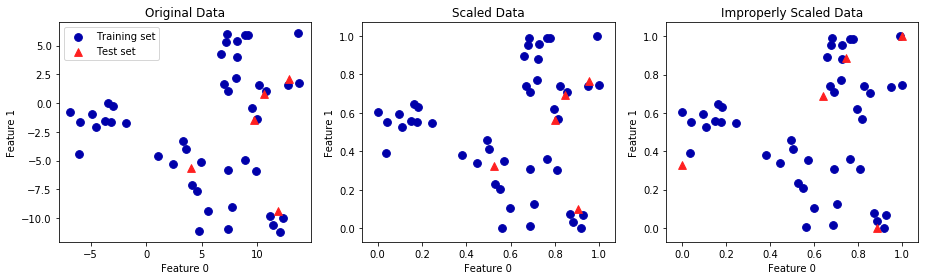

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

 - The second figure is the same data, but scaled using the MinMaxScaler. Here, we called fit on the training set, and then transform on the training and the test set.
 
 - You can also see that the minimum and maximum feature values for the test data (the red points) are not 0 and 1.
 
 - The third panel shows what would happen if we scaled training and test set separately.
 
  - The test points moved incongruously to the training set, as they were scaled differently. We changed the arrangement of the data in an arbitrary way. Clearly this is not what we want to do.
  
  - Another way to reason about this is the following: Imagine your test set was a single point. There is no way to scale a single point correctly, to fulfill the minimum and maximum requirements of the MinMaxScaler. But the size of your test set should not change your processing.

# 단축 메서드와 효율적인 방법

보통 어떤 데이터셋을 fit을 적용하면 transform을 호출. 이는 매우 전형적인 작업이라 fit과 transform 메서드를 가진 모델은 fit_transform 메서르를 제공 
아래는 StandardScaler를 사용한 것.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

fit_transform이 모든 모델에서 효율이 더 좋은것은 아니지만, 훈련 세트 변환에 이 메서드를 사용하는 것을 좋은 습관이다.

# The effect of preprocessing on supervised learning

 - Now let’s go back to the cancer dataset and see what the effect of using the Min MaxScaler is on learning the SVC

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


As we saw before, the effect of scaling the data is quite significant. Even though scaling
the data doesn’t involve any complicated math, it is good practice to use the scaling
mechanisms provided by scikit-learn, instead of reimplementing them yourself,
as making mistakes even in these simple computations is easy.

In [11]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# Dimensionality Reduction, Feature Extraction and Manifold Learning

 - Transforming data using unsupervised learning can have many motivations. The most common motivations are visualization, compressing thedata, and finding a representation that is more informative for further processing.

# Principal Component Analysis (PCA)

 - Principal component analysis (PCA) is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

선형대수학 정리 : https://darkpgmr.tistory.com/103 ~ https://darkpgmr.tistory.com/110

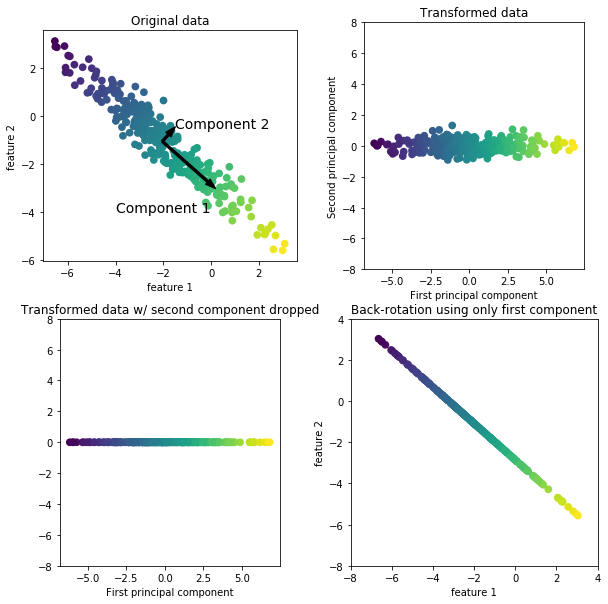

In [12]:
mglearn.plots.plot_pca_illustration()

 - The algorithm proceeds by first finding the direction of maximum variance, labeled as “Component 1”.
 
 - This is the direction in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other
 
 - Then, the algorithm finds the direction that contains the most information while being orthogonal (is at a right angle) to the first direction.
 
 - Although the two components are drawn as arrows, it doesn’t really matter where the head and the tail is; we could have drawn the first component from the center up to the top left instead of to the bottom right.
 
 * ---------------------------------------------------------------------------------------------------------------------------------------*
 
 
 
 #### The directions found using this process are called *principal components*, as they are the main directions of variance in the data. In general, there are as many principal components as original features.
 
 
 
 * ---------------------------------------------------------------------------------------------------------------------------------------*
 
 - The second plot shows the same data, but now rotated so that the first principal component aligns with the x axis, and the second principal component aligns with the y axis.
 
 - Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero.
  
 - In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.
   
 - We can use PCA for dimensionality reduction by retaining only some of the principal components.
 
 
 
 
 - This reduced the data from a two-dimensional dataset to a one-dimensional dataset. But instead of keeping only one of the original features, we found the most interesting direction (top left to bottom right in the first panel) and kept this direction, the first principal component.
 
 - Finally, we can undo the rotation, and add the mean back to the data
 
 
 
 
 ##  http://setosa.io/ev/principal-component-analysis/
 ## https://darkpgmr.tistory.com/110 
 ## https://wikidocs.net/7646
 ## https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22
 
 

### Applying PCA to the cancer dataset for visualization


 - One of the most common applications of PCA is visualizing high-dimensional datasets.
 
 - As we already saw in Chapter 1, it is hard to create scatter plots of data that has more than two features.
 
 - The breast cancer dataset has 30 features, which would result in 30 * 14 = 420 scatter plots!

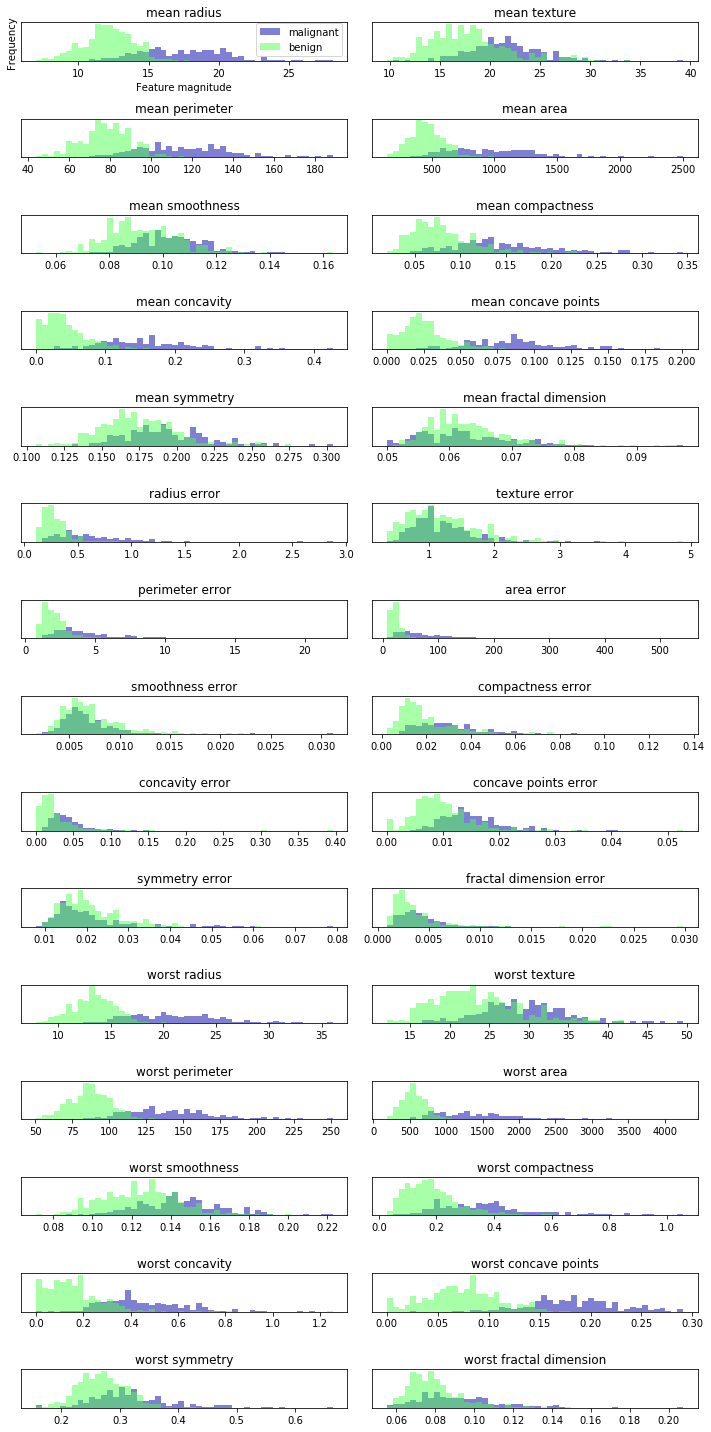

In [13]:
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

 - Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin).
 
 - Each plot overlays two histograms, one for all of the points of the benign class (blue) and one for all the points in the malignant class (red).
 
 - This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples.
  
  
  
 * ---------------------------------------------------------------------------------------------------------------------------------------* 
 
 
 - For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.
 
 - However, this plot doesn’t show us anything about the, which indicate variables that are varying together .
 
 - We can find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [14]:
# e scale our data so that each feature has unit variance using StandardScaler:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. 

- We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling transform.


 - By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object:
 
 
 ## SVD : https://darkpgmr.tistory.com/106

In [15]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

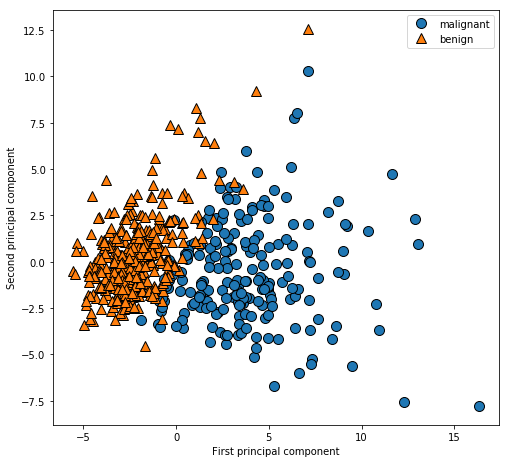

In [16]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- It is important to note is that PCA is an unsupervised method, and does not use any class information when finding the rotation.

- It simply looks at the correlations in the data

- For the scatter plot above, we plotted the first principal component against the second principal component, and then used the class information to color the points.

- This can lead us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes.

 - A downside of PCA is that the two axes in the plot above are often not very easy to interpret.
 
 - The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see below.
 
 - It simply looks at the correlations in the data.

In [17]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


- Each row in components_ corresponds to one principal component, sorted by their importance (the first principal component comes first, etc).

In [18]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal components')

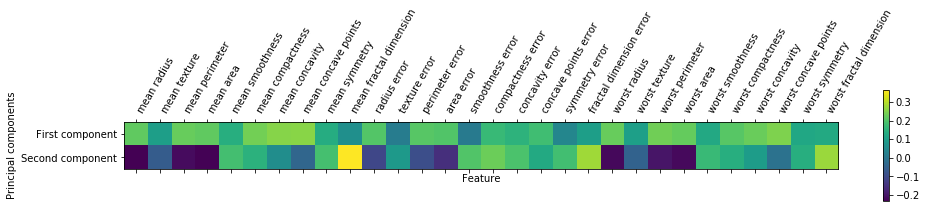

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

 - You can see that in the first component, all feature have the same sign (it’s negative, but as we mentioned above, it doesn’t matter in which direction you point the arrow).
 
 - That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well.
 
 - The second component has mixed signs, and both of the components involve all of the 30 features.

# Eigenfaces for feature extraction

- Another application of PCA that we mentioned above is feature extraction.

- The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given.

- Images are usually stored as red, green and blue intensities for each pixel. But images are made up of many pixels, and only together are they meaningful; objects in images are usually made up of thousands of pixels.



 - We will give a very simple application of feature extraction on images using PCA, using face images from the “labeled faces in the wild” dataset.
 
 - We use gray-scale versions of these images, and scale them down for faster processing. You can see some of the images below:

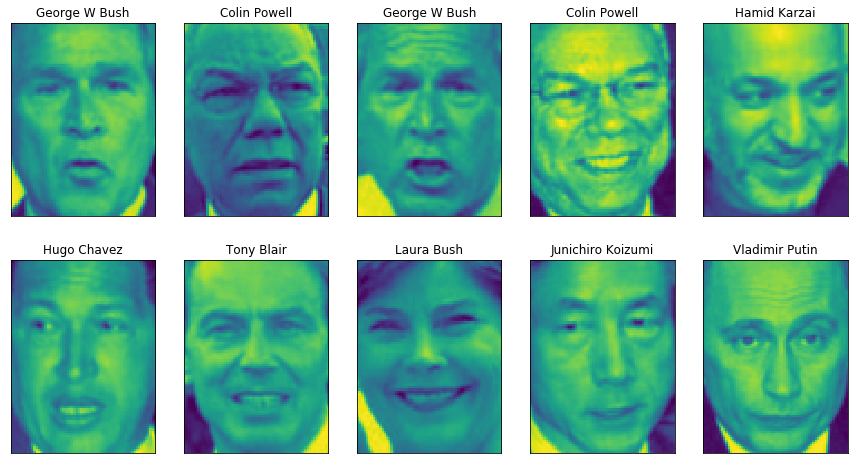

In [21]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [22]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2489, 87, 65)
Number of classes: 43


In [23]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Atal Bihari Vajpayee       24   
Bill Clinton               29   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Hamid Karzai               22   Hans Blix                  39   Hugo Chavez                71   
Igor Ivanov                20   Jack Straw                 28   Jacques Chirac             52   
Jean Chretien              55   Jennifer Aniston           21   Jennifer Capriati          42   
John Ashcroft              53   Juan Carlos Ferrero        28   Junichiro Koizumi          60   
Kofi Annan                 32   Laura Bush                 41   Lindsay Davenport          22   
Lleyton Hewitt             41 

- To make the data less skewed, we will only take up to 50 images of each person. Otherwise the feature extraction would be overwhelmed by the likelihood of George W Bush.

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

- A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database.

- One way to solve this problem would be to build a classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e. very few training examples per class).

- A simple solution is to use a one-nearest-neighbor classifier which looks for the most similar face image to the face you are classifying. A one-nearest-neighbor could in principle work with only a single training example per class. Let’s see how well KNeigh borsClassifier does here:

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.27


In [27]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Test set score of 3-nn: {:.5f}".format(knn.score(X_test, y_test)))

Test set score of 3-nn: 0.23760


- we obtain an accuracy of 26.6%, which is not actually that bad for a 62 class classification problem (random guessing would give you around 1/62 = 1.5% accuracy), but is also not great. We only correctly identify a person a every fourth time.

- This is where PCA comes in. Computing distances in the original pixel space is quite a bad way to measure similarity between faces [add a sentence saying why].

- We hope that using distances along principal components can improve our accuracy.

- Here we enable the whitening option of PCA, which rescales the principal components to have the same scale. This is the same as using StandardScaler after the transformation.

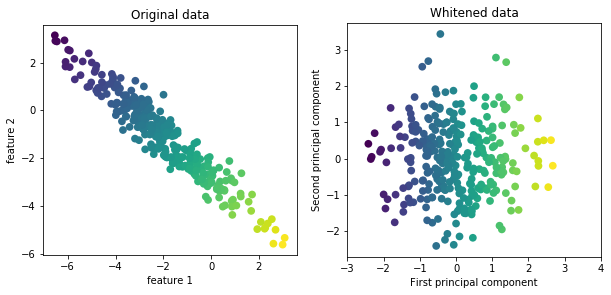

In [28]:
mglearn.plots.plot_pca_whitening()

 - We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [29]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1146, 100)


- The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using one-nearest-neighbors:

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.38


## For image data, we can also easily visualize the principal components that are found. Remember that components correspond to directions in the input space.

In [31]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


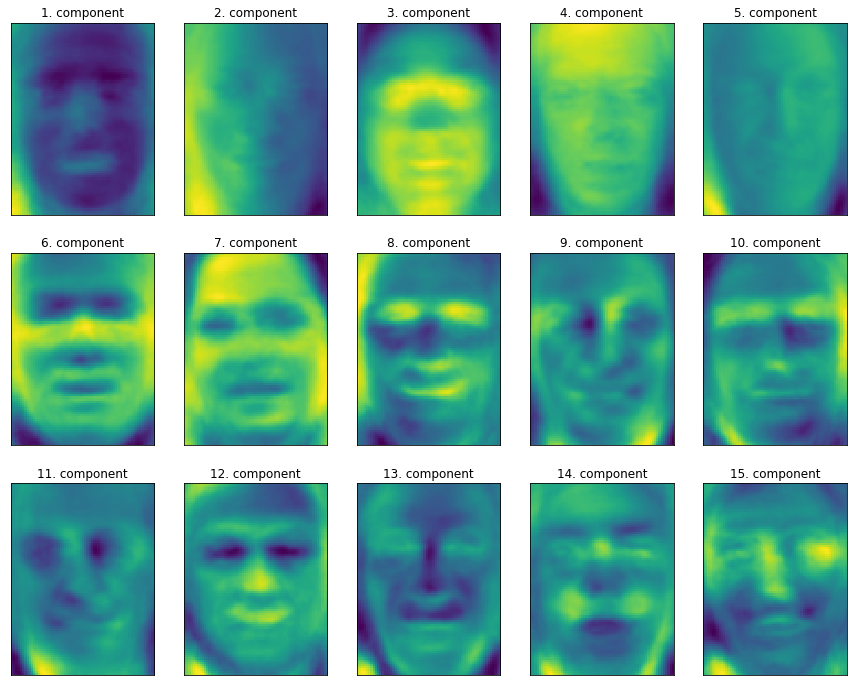

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- While we certainly can not understand all aspects of these components, we can guess which aspects of the face images some of the components are capturing.

 - The first component seems to mostly encode the contrast between the face and the background, the second component encodes differences in lighting between the right and the left half of the face, and so on.
 
 - As the PCA is based on pixels, the alignment of the face (the position of eyes, chin and nose), as well as the lighting, both have a strong influence on how similar to images are in their pixel representation.
 
 - It’s important to keep in mind that algorithms often interpret data, in particular data that humans are used to understand, like images, quite differently from how a human would.
 
 - Above we introduced the PCA transformation as rotating the data, and then dropping the components with low variance.
 
 - Another useful interpretation is that we try to find some numbers (the new feature values after the PCA rotation), so that we can express the test points as a weighted sum of the principal components:

In [34]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
#plt.savefig("images/03-face_decomposition.png")
plt.close()

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.827451, ..., 0.168627],
       ...,
       [0.447059, ..., 0.79085 ]], dtype=float32), 
array([[0.909804, ..., 0.484967],
       ...,
       [0.607843, ..., 0.820915]], dtype=float32))
________________________________________________________pca_faces - 1.3s, 0.0min


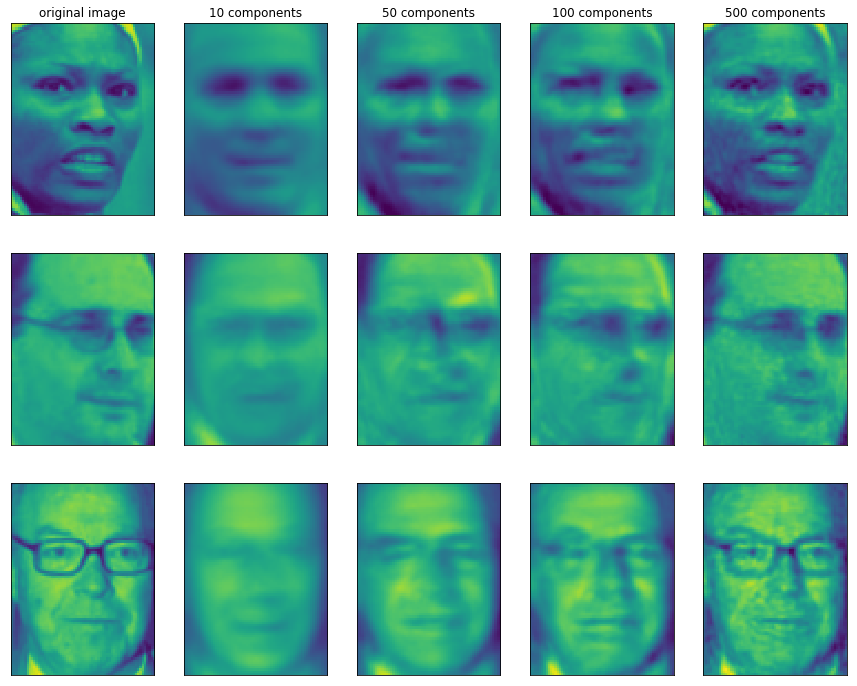

In [35]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

- You can see that with using only the first 10 principal components, only the essence of the picture, like the face orientation and lighting, is captured.

- Using more and more principal components, more and more details in the image are preserved.

- Using as many components as there are pixels would mean that we would not discard any information after the rotation, and we would reconstruct the image perfectly.

- We can also try to use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components, with classes given by who is shown in the image, similarly to what we did for the cancer dataset:

Text(0,0.5,'Second principal component')

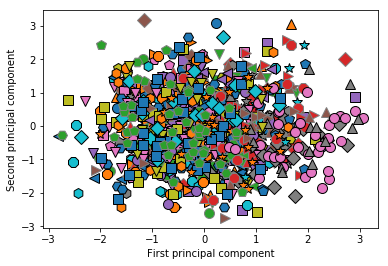

In [36]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")